# Facing the binary classification problem in a naive way without Feature Rescaling/Selection

In this notebook I have applied three different classification algorithm, i.e.:
- Logistic Regression
- SVM
- Decision Tree
to make quick predictions. Here the data have not been processed (except for the Encoding for which "M"->0, "R"->1).
Even without feature rescaling and selection, good accuracy results can be obtained. 
To see the results with more complex data preparation look at the 

In [18]:
# My personal function to plot and print
from my_plotting import plot_roc_and_precision_recall
from my_plotting import plot_confusion_matrix_based_on_prediction
from my_printing import print_results_prediction

#Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

#For ML Data Processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#For ML Classification Algorithms
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


#ML Metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve

#Seed Used:
seed=4

In [19]:
#Load Data
data = pd.read_csv("sonar.csv", header=None)
X=np.array(data.iloc[:,:-1])
Y=np.array(data[60])

#Convert M->0, R->1 : 
Label_Encoder = preprocessing.LabelEncoder()
Y=Label_Encoder.fit_transform(Y)

#Split into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=seed)

#Data Train Matrix
data_array=np.c_[X_train,Y_train]

#Features of class rock
rock_features=data_array[data_array[:,-1]==1][:,:-1]
#Features of class mine
mine_features=data_array[data_array[:,-1]==0][:,:-1]


#Results Container:
#List of Model used:
model=["Logistic Regression","SVM","Decision Tree"]
accuracy_res=[] #Accuracy Results
training_time=[] #Time need to train
#TPR=[] #True Positive Rate
#FPR=[] #False Positive Rate
#TNR=[] #True Negative Rate
#FNR=[] #False Negative Rate
precision_res=[] #Precision 
recall_res=[] #Recall results
AUC=[] #Area Under the Curve (ROC)


-------------

# Logistic Regression

Results of Logistic Regression:


Accuracy on Test Data = 78.571%


Class "1" (Rock) : 
     precision: 0.750
     recall: 0.706
     f1-score: 0.727


Class "0" (Mine) : 
     precision: 0.808
     recall: 0.840
     f1-score: 0.824




<Figure size 360x360 with 0 Axes>

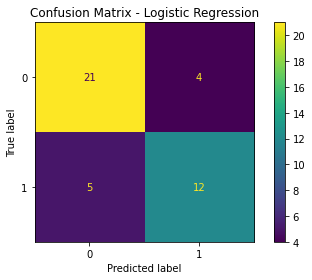

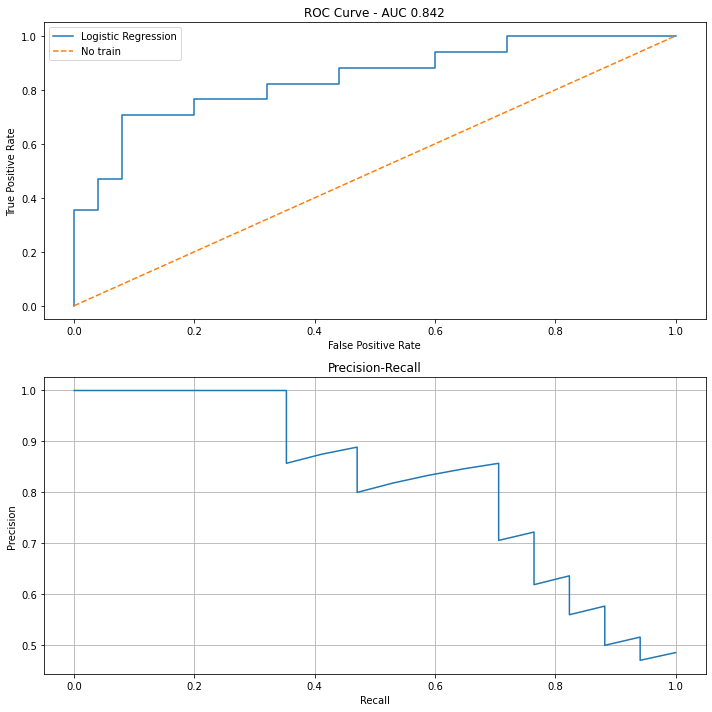

In [20]:
start_time = time.time()

#Model Definition
model=LogisticRegression()
estimators=model.fit(X_train, Y_train)

#Calculating training time
training_time.append(time.time()-start_time)

#Results
result = model.score(X_test, Y_test)

#Prediction
Y_predicted = model.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_true=Y_test, y_pred=Y_predicted)
classification_rep = classification_report(y_true=Y_test,target_names=["Mine","Rock"],y_pred=Y_predicted,output_dict=True)
print_results_prediction(accuracy,classification_rep,model="Logistic Regression")





#Confusion Matrix 
plot_confusion_matrix_based_on_prediction(Y_test,Y_predicted,model="Logistic Regression")


#Retrieve Probability on Positive Class:
scores = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

#Calculate AUC
auc = roc_auc_score(Y_test, scores)

#Plot ROC and Precision-Recall
precision, recall, thresholds= precision_recall_curve(Y_test, scores)
plot_roc_and_precision_recall(fpr,tpr,auc,precision,recall,model="Logistic Regression")



#Filling results container 
accuracy_res.append(accuracy)
AUC.append(auc)
precision_res.append(classification_rep["Rock"]["precision"])
recall_res.append(classification_rep["Rock"]["recall"])

------

# Supervised Learning with Support Vector Machines

Results of Support Vector Machine:


Accuracy on Test Data = 83.333%


Class "1" (Rock) : 
     precision: 1.000
     recall: 0.588
     f1-score: 0.741


Class "0" (Mine) : 
     precision: 0.781
     recall: 1.000
     f1-score: 0.877




<Figure size 360x360 with 0 Axes>

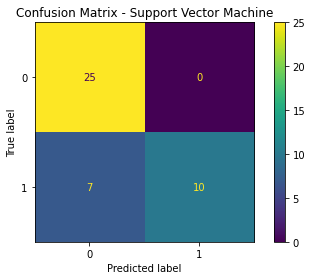

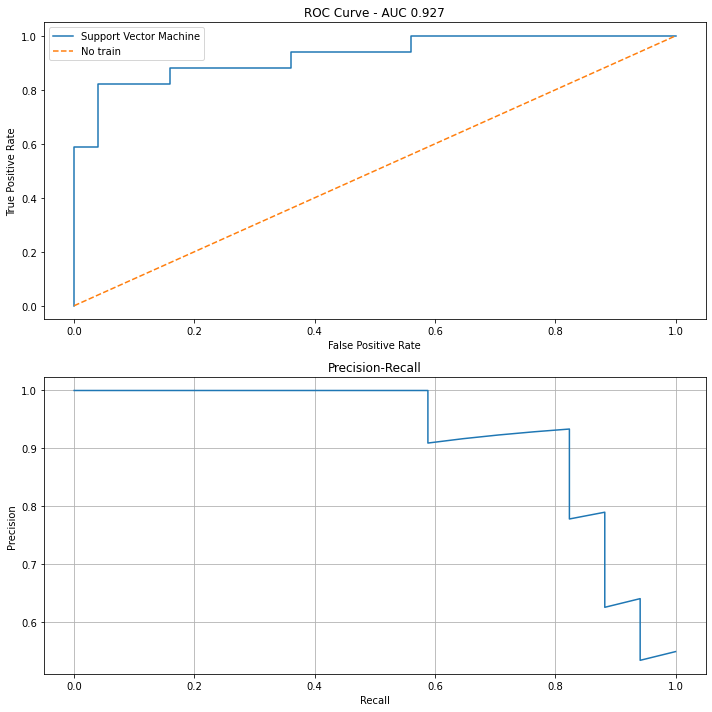

In [21]:
start_time = time.time()

#Model Definition
clf = svm.SVC(probability=True)
estimators =clf.fit(X_train, Y_train)

#Calculating training time
training_time.append(time.time()-start_time)


#Prediction
Y_predicted = clf.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_true=Y_test, y_pred=Y_predicted)
classification_rep = classification_report(y_true=Y_test,target_names=["Mine","Rock"],y_pred=Y_predicted,output_dict=True)
print_results_prediction(accuracy,classification_rep,model="Support Vector Machine")

#Confusion Matrix 
plot_confusion_matrix_based_on_prediction(Y_test,Y_predicted,model="Support Vector Machine")


#Retrieve Probability on Positive Class:
scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

#Calculate AUC
auc = roc_auc_score(Y_test, scores)
#Plot ROC and Precision-Recall
precision, recall, thresholds= precision_recall_curve(Y_test, scores)
plot_roc_and_precision_recall(fpr,tpr,auc,precision,recall,model="Support Vector Machine")


#Filling results container 
accuracy_res.append(accuracy)
AUC.append(auc)
precision_res.append(classification_rep["Rock"]["precision"])
recall_res.append(classification_rep["Rock"]["recall"])

-----


# Decision Tree

Results of Decision Tree:


Accuracy on Test Data = 76.190%


Class "1" (Rock) : 
     precision: 0.684
     recall: 0.765
     f1-score: 0.722


Class "0" (Mine) : 
     precision: 0.826
     recall: 0.760
     f1-score: 0.792




<Figure size 360x360 with 0 Axes>

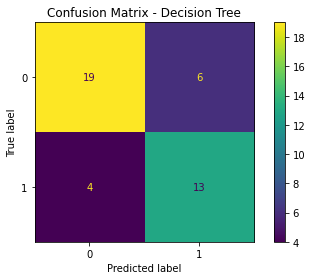

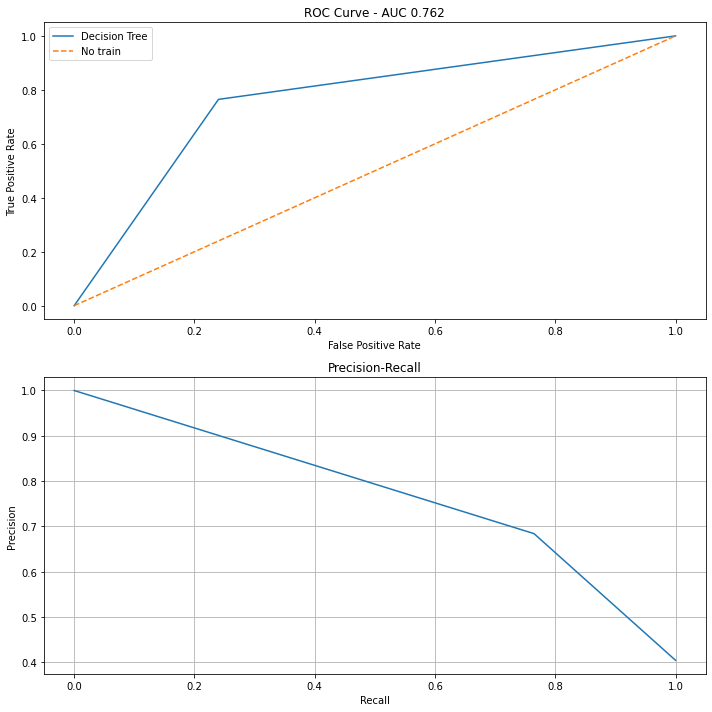

In [22]:

start_time = time.time()

#Model Definition
clf = tree.DecisionTreeClassifier()
estimators =clf.fit(X_train, Y_train)

#Calculating training time
training_time.append(time.time()-start_time)


#Prediction
Y_predicted = clf.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_true=Y_test, y_pred=Y_predicted)
#Report of the classification
classification_rep = classification_report(y_true=Y_test,target_names=["Mine","Rock"],y_pred=Y_predicted,output_dict=True)
print_results_prediction(accuracy,classification_rep,model="Decision Tree")


#Confusion Matrix
plot_confusion_matrix_based_on_prediction(Y_test,Y_predicted,model="Decision Tree")

#Retrieve Probability on Positive Class:
scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, scores, pos_label=1)

#Calculate AUC
auc = roc_auc_score(Y_test, scores)
#Plot ROC and Precision-Recall
precision, recall, thresholds= precision_recall_curve(Y_test, scores)
plot_roc_and_precision_recall(fpr,tpr,auc,precision,recall,model="Decision Tree")

#Filling results container
accuracy_res.append(accuracy)
AUC.append(auc)
precision_res.append(classification_rep["Rock"]["precision"])
recall_res.append(classification_rep["Rock"]["recall"])

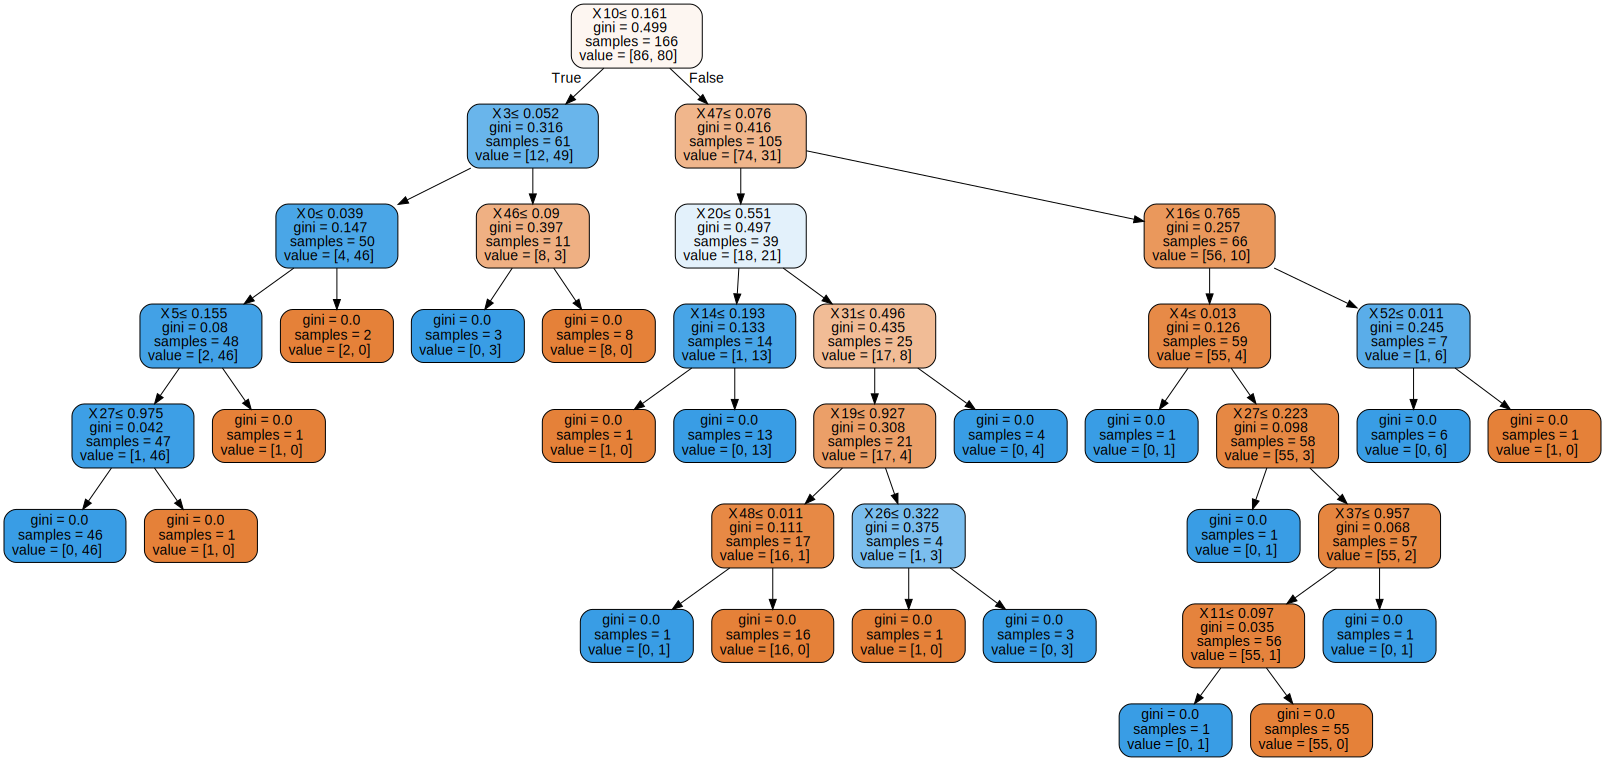

In [23]:
#Plot of the Decision Tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                #feature_names=data.feature_names,  
                                #class_names=data.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 



-----


# Comparison of algorithms

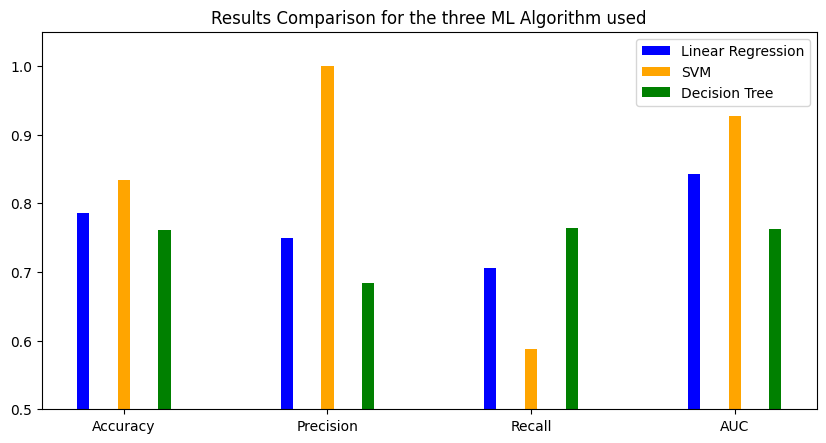

In [24]:
plt.figure(figsize=(10,5),dpi=100)
plt.bar(x=1,height=accuracy_res[0],width=0.3,color="Blue",label="Linear Regression")
plt.bar(x=2,height=accuracy_res[1],width=0.3,color="Orange",label="SVM")
plt.bar(x=3,height=accuracy_res[2],width=0.3,color="Green",label="Decision Tree")
plt.bar(x=6,height=precision_res[0] ,width=0.3,color="Blue")
plt.bar(x=7,height=precision_res[1],width=0.3,color="Orange")
plt.bar(x=8,height=precision_res[2],width=0.3,color="Green")
plt.bar(x=11,height=recall_res[0],width=0.3,color="Blue")
plt.bar(x=12,height=recall_res[1],width=0.3,color="Orange")
plt.bar(x=13,height=recall_res[2],width=0.3,color="Green")
plt.bar(x=16,height=AUC[0],width=0.3,color="Blue")
plt.bar(x=17,height=AUC[1],width=0.3,color="Orange")
plt.bar(x=18,height=AUC[2],width=0.3,color="Green")
plt.legend()
plt.title("Results Comparison for the three ML Algorithm used")
plt.xticks([2,7,12,17],["Accuracy", "Precision", "Recall", "AUC"])
plt.ylim(0.5,1.05)
plt.show()

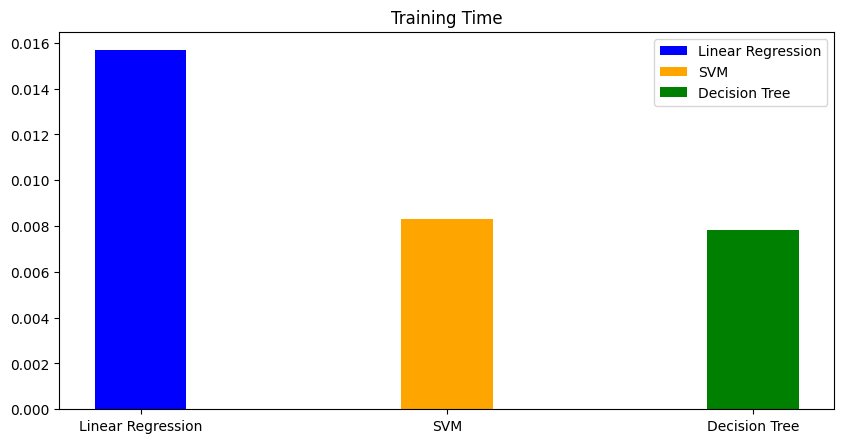

In [25]:
plt.figure(figsize=(10,5),dpi=100)
plt.bar(x=1,height=training_time[0],width=0.3,color="Blue",label="Linear Regression")
plt.bar(x=2,height=training_time[1],width=0.3,color="Orange",label="SVM")
plt.bar(x=3,height=training_time[2],width=0.3,color="Green",label="Decision Tree")
plt.legend()
plt.title("Training Time")
plt.xticks([1,2,3],["Linear Regression","SVM","Decision Tree"])
#plt.ylim(0.5,1.05)
plt.show()

# Conclusions:

####  - The most precise and accurate Algorithm seems to be the SVM one (which also shows good training time).
#### - Could be improved with Feature Rescaling and Reduction? -> Check realted notebook